In [67]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

# 1: Hypothesis testing on Gaussian sampling distributions

### 1.1: Write a sampling model that returns samples from the likelihood ratio test for a Gaussian distribution with mean $\mu$ and $\sigma=1$. Visualize the samples for $\mu=0.5$ (which will be our null hypothesis) and for $\mu=2.0$ (which will be our alternative hypothesis)

Use the likelihood ratio test defined as:

$$t_\mu = -2 \log \frac{L(\mu)}{L(\hat{\mu})}$$

In [107]:
null_hypo, alt_hypo = 0.5, 2.0

In [99]:
def model(mu):
    return sps.norm(loc=mu)

In [100]:
null_samples = model(null_hypo).rvs(size=100_000)
alt_samples = model(alt_hypo).rvs(size=100_000)

In [103]:
def lhood_ratio_test(data):
    mu_hat = data
    return -2*(model(null_hypo).logpdf(data) - model(mu_hat).logpdf(data))  

Text(0.5, 0, '$t_\\mu$')

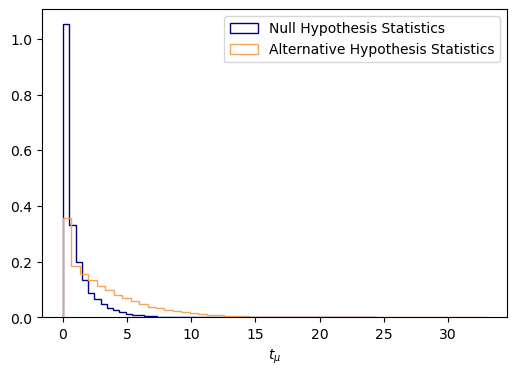

In [104]:
null_statistics = lhood_ratio_test(null_samples)
alt_statistics = lhood_ratio_test(alt_samples)

fig, ax = plt.subplots(figsize=(6, 4))

ax.hist(null_statistics, density=True, bins = 50, color='navy', histtype='step', label='Null Hypothesis Statistics')
ax.hist(alt_statistics, density=True, bins = 50, color='sandybrown', histtype='step', label='Alternative Hypothesis Statistics')

ax.legend(loc='upper right')
ax.set_xlabel('$t_\mu$')

### 1.2 What is the required threshold value in the test statistic in order to achieve a test of size 5%?

We can calculate the threshold value for a test size of 5% by determining the rejection region where 5% of the null samples have a larger value:

In [105]:
sorted_null_statistics = np.sort(null_statistics)

cut_off = sorted_null_statistics[int(0.95*len(sorted_null_statistics))]
 
cut_sorted_null_statistics = sorted_null_statistics[int(0.95*len(sorted_null_statistics)):]

Text(0.5, 0, '$t_\\mu$')

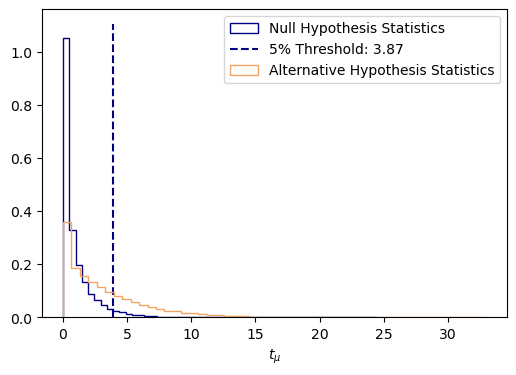

In [106]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.hist(null_statistics, density=True, bins=50, color='navy', histtype='step', label='Null Hypothesis Statistics')
ax.vlines(cut_off, ymin=0, ymax=ax.get_ylim()[1], color='navy', linestyles ='--', label=f'5% Threshold: {cut_off:.2f}')

ax.hist(alt_statistics, density=True, bins=50, color='sandybrown', histtype='step', label='Alternative Hypothesis Statistics')


ax.legend(loc='upper right')
ax.set_xlabel('$t_\mu$')

Text(0, 0.5, '$t_\\mu$')

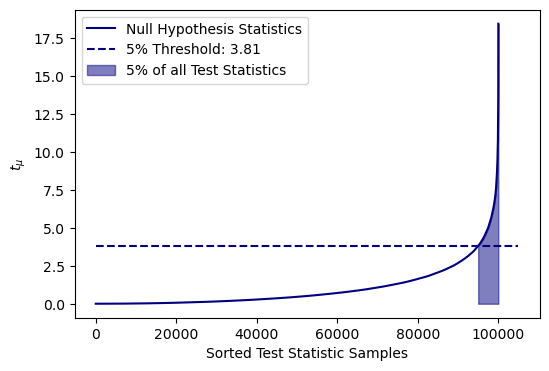

In [75]:
# Different visualizaion
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(np.arange(0, len(sorted_null_statistics)), sorted_null_statistics, color='navy', label='Null Hypothesis Statistics')
ax.hlines(cut_off, xmin=0, xmax=ax.get_xlim()[1], color='navy', linestyles ='--', label=f'5% Threshold: {cut_off:.2f}')

ax.fill_between(np.arange(0, len(sorted_null_statistics)), sorted_null_statistics, color='navy', alpha=0.5, where=(np.arange(0, len(sorted_null_statistics)) > int(0.95*len(sorted_null_statistics))),label='5% of all Test Statistics')

ax.legend(loc='upper left')

ax.set_xlabel('Sorted Test Statistic Samples')
ax.set_ylabel('$t_\mu$')

### 1.2: For the observation $x=2.7$, compute an approximate p-value based on the sampled data. Given that p-value, would you accept or reject the null-hypothesis?

We can calculate the p-value by finding the fraction of null samples that have a higher test statistics value.

In [76]:
observed = 2.7

In [77]:
observed_statistics = lhood_ratio_test(observed)

test_stats_above_observed = [a for a in null_statistics if a > observed_statistics]

p_value = len(test_stats_above_observed) / len(sorted_null_statistics)

print(f'We find a p-value of {p_value:.2f}')

We find a p-value of 0.03


Text(0, 0.5, '$t_\\mu$')

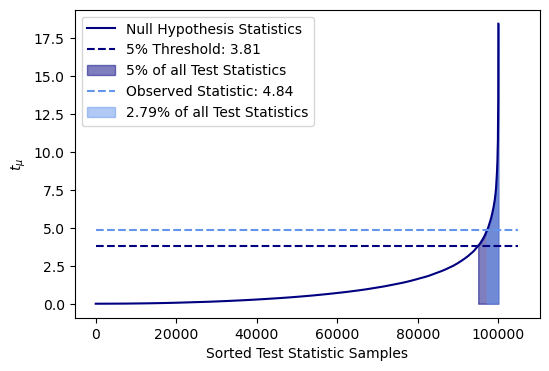

In [78]:
fig, ax = plt.subplots(figsize=(6, 4))


ax.plot(np.arange(0, len(sorted_null_statistics)), sorted_null_statistics, color='navy', label='Null Hypothesis Statistics')

xmax = ax.get_xlim()[1]

ax.hlines(cut_off, xmin=0, xmax=xmax, color='navy', linestyles ='--', label=f'5% Threshold: {cut_off:.2f}')
ax.fill_between(np.arange(0, len(sorted_null_statistics)), sorted_null_statistics, color='navy', alpha=0.5, where=(np.arange(0, len(sorted_null_statistics)) > int(0.95*len(sorted_null_statistics))),label='5% of all Test Statistics')
ax.hlines(observed_statistics, xmin=0, xmax=xmax, color='cornflowerblue', linestyles ='--', label=f'Observed Statistic: {observed_statistics:.2f}')
ax.fill_between(np.arange(0, len(sorted_null_statistics)), sorted_null_statistics, color='cornflowerblue', alpha=0.5, where=(sorted_null_statistics > observed_statistics),label=f'{p_value*100:.2f}% of all Test Statistics')


ax.legend(loc='upper left')

ax.set_xlabel('Sorted Test Statistic Samples')
ax.set_ylabel('$t_\mu$')

We reject the null hypothesis, given that the p-value is smaller than 0.05.

# 2: Poisson Intervals

Take a Poisson distribution $Poiss(n|s + b)$ with known background $b = 3.0$ and signal $s$. Assume you have observed 8 events.


In [79]:
observed = 8

### 2.1: Create a function that returns the Poisson model above, as a function of $s$.

In [80]:
def model(s):
    return sps.poisson(s+3.0)

### 2.2: At which value for $s$ does the probability to observe data less extreme than your observation (i.e. a value smaller than your observation 8) drop below 0.05? At which value does the probablity to observe more extreme events drop below 0.05?

In [81]:
def less_extreme_prob(data, s):
    return model(s).cdf(data)

def more_extreme_prob(data, s):
    return 1 - model(s).cdf(data)

In [82]:
s_scan = np.linspace(0,20)

less_prob = np.array([less_extreme_prob(observed, mu) for mu in s_scan]) 
more_prob = np.array([more_extreme_prob(observed, mu) for mu in s_scan])

less_cutoff = np.interp(0.05, less_prob[::-1], s_scan[::-1])
more_cutoff = np.interp(0.05, more_prob, s_scan)

Text(0, 0.5, 'Probablilty')

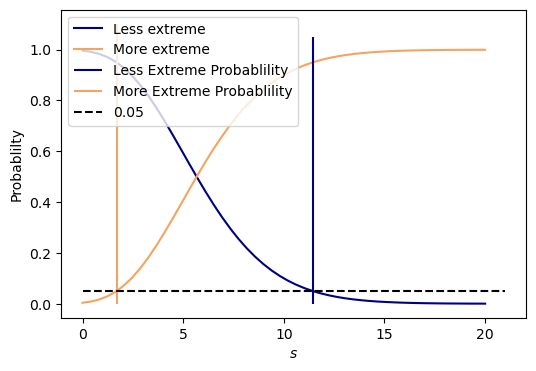

In [83]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(s_scan, less_prob, color='navy', label='Less extreme')
ax.plot(s_scan, more_prob, color='sandybrown', label='More extreme')

ymax = ax.get_ylim()[1]
xmax = ax.get_xlim()[1]

ax.vlines(less_cutoff, ymin=0, ymax=ax.get_ylim()[1], color='navy', label=f'Less Extreme Probablility')
ax.vlines(more_cutoff, ymin=0, ymax=ax.get_ylim()[1], color='sandybrown', label=f'More Extreme Probablility')

ax.hlines(0.05, xmin=0, xmax=xmax, color='k', linestyles ='--', label=f'0.05')


ax.legend(loc='upper left')

ax.set_xlabel('$s$')
ax.set_ylabel('Probablilty')

In [84]:
print(f'Above {less_cutoff:.2f} and below {more_cutoff:.2f} is 8 in the rejection region.')

Above 11.44 and below 1.69 is 8 in the rejection region.


### 2.3: Neyman Construction: Generalize 2.2 to any observed data and plot the acceptance region over the observed data.

In [85]:
def get_poisson_two_sided_interval(data):
    s_scan = np.linspace(0,20)
    left = np.array([model(mu).cdf(data) for mu in s_scan])
    right = np.array([1-model(mu).cdf(data) for mu in s_scan])
    a = np.interp(0.05,left[::-1],s_scan[::-1])
    b = np.interp(0.05,right,s_scan)
    return np.array([b,a])

Text(0.5, 0, 'Data')

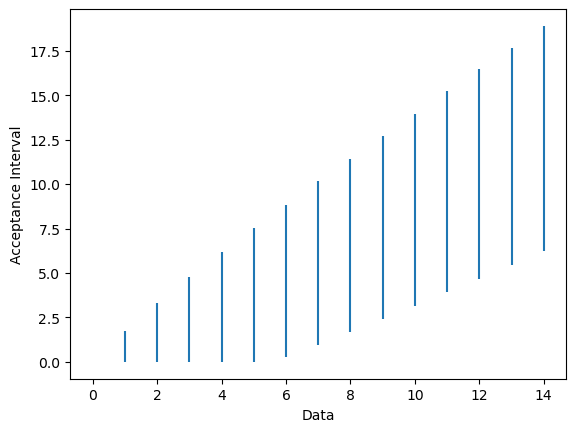

In [86]:
data_scan = np.arange(0,15)
intervals = np.array([get_poisson_two_sided_interval(d) for d in data_scan])
plt.vlines(data_scan,intervals[:,0],intervals[:,1])

plt.ylabel('Acceptance Interval')
plt.xlabel('Data')